In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('video_games.csv')
df.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


### Removing lines with NA values

In [4]:
(df.isna().sum(axis=1) > 0).sum()

71

In [5]:
len(df)

5824

In [6]:
(df.isna().sum(axis=1) > 0).sum() / len(df)

0.012190934065934066

In [7]:
df = df.dropna()

In [8]:
len(df)

5753

### Limiting dataset to main games

In [9]:
len(df[df['category'] == 'main_game']) / len(df)

0.8571180253780636

In [10]:
df = df[df['category'] == 'main_game']
df = df.drop(labels=['category'], axis=1)

In [11]:
len(df[df['year'] >= 2010]) / len(df)

0.4668424254715068

### EDA

<AxesSubplot:>

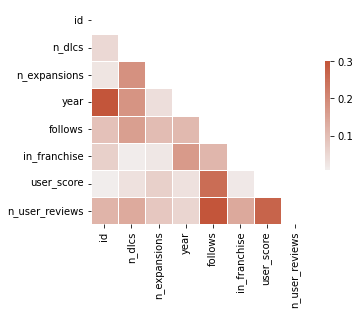

In [12]:
corr = abs(df.corr())
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
aux_df = pd.DataFrame(df['user_rating'].value_counts())
aux_df = aux_df.reindex(['mediocre', 'bad', 'good', 'great']).reset_index()

px.bar(aux_df, x='index', y='user_rating')

In [14]:
px.histogram(df, x='user_score', nbins=20)

In [15]:
plot_df = pd.DataFrame(df['in_franchise'].value_counts()).reset_index()
plot_df = plot_df.reindex(index=plot_df.index[::-1])

px.bar(plot_df, x='index', y='in_franchise')

Genres

In [16]:
genres_dict = dict()
for row in df['genres']:
    for g in row.replace(' ', '').split(','):
        if g in genres_dict.keys():
            genres_dict[g] += 1
        else:
            genres_dict[g] = 1

print(len(set(genres_dict.keys())))

genres_df = pd.DataFrame({'genre': genres_dict.keys(), 'count': genres_dict.values()})
genres_df = genres_df.sort_values('count')
px.bar(genres_df, x='genre', y='count')

23


In [17]:
px.box(genres_df, y='count')

In [18]:
genre_score_dict = dict()
for g in set(genres_dict.keys()):
    genre_score_dict[g] = []

for row_genre, score in zip(df['genres'], df['user_score']):
    for g in row_genre.replace(' ', '').split(','):
        genre_score_dict[g].append(score)

plot_df = pd.DataFrame([{
    'genre': key, 
    'score_mean': np.mean(value), 
    'score_median': np.median(value)
} for key, value in genre_score_dict.items()]).sort_values('score_mean')

px.bar(plot_df, x='genre', y='score_mean')

Companies

In [19]:
companies_dict = dict()
for row in df['companies']:
    for c in row.replace(' ', '').split(','):
        if c in companies_dict.keys():
            companies_dict[c] += 1
        else:
            companies_dict[c] = 1

print(len(set(companies_dict.keys())))

companies_df = pd.DataFrame({'company': companies_dict.keys(), 'count': companies_dict.values()})
companies_df = companies_df.sort_values('count')
px.bar(companies_df[companies_df['count'] >= 20], x='company', y='count')

3232


In [20]:
px.box(companies_df, y='count', log_y=True)

In [21]:
platform_score_dict = dict()
for c in set(companies_dict.keys()):
    platform_score_dict[c] = []

for row_companies, score in zip(df['companies'], df['user_score']):
    for c in row_companies.replace(' ', '').split(','):
        platform_score_dict[c].append(score)

aux_df = pd.DataFrame([{
    'company': key, 
    'score_mean': np.mean(value), 
    'score_median': np.median(value),
    'count': len(value)
} for key, value in platform_score_dict.items()])

px.bar(aux_df.sort_values('score_mean')[aux_df['count'] >= 20], x='company', y='score_mean')

/tmp/ipykernel_13529/990377423.py:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Platform

In [22]:
platform_dict = dict()
for row in df['platforms']:
    for p in row.replace(' ', '').split(','):
        if p in platform_dict.keys():
            platform_dict[p] += 1
        else:
            platform_dict[p] = 1

print(len(set(platform_dict.keys())))

platform_df = pd.DataFrame({'platform': platform_dict.keys(), 'count': platform_dict.values()})
platform_df = platform_df.sort_values('count')
px.bar(platform_df[platform_df['count'] >= 100], x='platform', y='count')

124


In [23]:
platform_score_dict = dict()
for p in set(platform_dict.keys()):
    platform_score_dict[p] = []

for row_platform, score in zip(df['platforms'], df['user_score']):
    for p in row_platform.replace(' ', '').split(','):
        platform_score_dict[p].append(score)

aux_df = pd.DataFrame([{
    'platform': key, 
    'score_mean': np.mean(value), 
    'score_median': np.median(value)
} for key, value in platform_score_dict.items()])

px.bar(aux_df.sort_values('score_mean'), x='platform', y='score_mean')

### Removing columns

In [24]:
#cols_to_delete = ['id', 'name', 'year', 'summary']
#df = df.drop(labels=cols_to_delete, axis=1)

Removes `user_rating` because it's directly related to `user_scor`

In [25]:
df = df.drop(labels=['user_rating'], axis=1)

### Feature engineering

In [26]:
cols_to_keep = ['n_dlcs', 'n_expansions', 'follows', 'n_user_reviews', 'user_score']
new_df = df[cols_to_keep]

In [27]:
new_df.head()

,n_dlcs,n_expansions,follows,n_user_reviews,user_score
0,0,0,1766,3369,90.202388
1,4,2,1516,2997,95.169577
2,3,0,1046,2567,87.508504
3,3,0,963,2544,91.650705
4,0,0,894,2297,86.931758


One hot encoding genres

In [28]:
# new_cols = []
# genres = [k for k, v in genres_dict.items() if v >= 196]
# for row in df['genres']:
#     genres_in_row = row.replace(' ', '').split(',')
#     new_cols_for_row = dict()
#     for g in genres:
#         new_cols_for_row[f'genre_{g}'] = g in genres_in_row
#     new_cols.append(new_cols_for_row)
    
# new_df = pd.concat([new_df, pd.DataFrame(new_cols)], axis=1)

genres = [k for k, v in genres_dict.items() if v >= 196]
new_cols = dict()
for g in genres:
    new_cols[f'genre_{g}'] = []

for row in df['genres']:
    genres_in_row = row.replace(' ', '').split(',')
    for g in genres:
        new_cols[f'genre_{g}'].append(g in genres_in_row)

for g in genres:
    new_df.loc[:, f'genre_{g}'] = new_cols[f'genre_{g}']

/home/matheus/.miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/matheus/.miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



One hot encoding companies

In [29]:
companies = [k for k, v in companies_dict.items() if v >= 138]
new_cols = dict()
for c in companies:
    new_cols[f'company_{c}'] = []

for row in df['companies']:
    companies_in_row = row.replace(' ', '').split(',')
    for c in companies:
        new_cols[f'company_{c}'].append(c in companies_in_row)

for c in companies:
    new_df.loc[:, f'company_{c}'] = new_cols[f'company_{c}']


# for row in df['companies']:
#     companies_in_row = row.replace(' ', '').split(',')
#     new_cols_for_row = dict()
#     for c in companies:
#         new_cols_for_row[f'company_{c}'] = c in companies_in_row
#     new_cols.append(new_cols_for_row)
    
# new_df = pd.concat([new_df, pd.DataFrame(new_cols)], axis=1)

One hot encoding platforms

In [30]:
def to_keep(platform):
    return platform == 'PC(MicrosoftWindows)' \
        or platform.lower() == 'nintendogamecube' \
        or platform.lower() == 'nintendo64' \
        or platform.lower() == 'nintendoswitch' \
        or platform.lower() in (['playstation'] + [f'playstation{i}' for i in range(2, 6)]) \
        or 'xbox' in platform.lower() \
        or 'wii' in platform.lower() \
        
platforms_to_keep = [p for p in platform_dict.keys() if to_keep(p)]
sorted(platforms_to_keep)

['Nintendo64',
 'NintendoGameCube',
 'NintendoSwitch',
 'PC(MicrosoftWindows)',
 'PlayStation',
 'PlayStation2',
 'PlayStation3',
 'PlayStation4',
 'PlayStation5',
 'Wii',
 'WiiU',
 'Xbox',
 'Xbox360',
 'XboxOne',
 'XboxSeriesX|S']

In [31]:
# new_cols = []
# for row in df['platforms']:
#     platforms_in_row = row.replace(' ', '').split(',')
#     new_cols_for_row = dict()
#     for p in platforms_to_keep:
#         new_cols_for_row[f'platform_{p}'] = p in platforms_in_row
#     new_cols.append(new_cols_for_row)
    
# new_df = pd.concat([new_df, pd.DataFrame(new_cols)], axis=1)

new_cols = dict()
for p in platforms_to_keep:
    new_cols[f'platform_{p}'] = []

for row in df['platforms']:
    platforms_in_row = row.replace(' ', '').split(',')
    for p in platforms_to_keep:
        new_cols[f'platform_{p}'].append(p in platforms_to_keep)

for p in platforms_to_keep:
    new_df.loc[:, f'platform_{p}'] = new_cols[f'platform_{p}']

In [32]:
new_df

,n_dlcs,n_expansions,follows,n_user_reviews,user_score,genre_Shooter,genre_Adventure,genre_Role-playing(RPG),genre_Platform,genre_Puzzle,...,platform_PlayStation5,platform_XboxSeriesX|S,platform_NintendoSwitch,platform_PlayStation2,platform_Xbox,platform_WiiU,platform_Nintendo64,platform_Wii,platform_NintendoGameCube,platform_PlayStation
0,0,0,1766,3369,90.202388,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,4,2,1516,2997,95.169577,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
2,3,0,1046,2567,87.508504,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,3,0,963,2544,91.650705,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,0,0,894,2297,86.931758,True,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,1,0,3,11,89.933512,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
5817,0,0,6,11,76.808099,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
5818,0,0,6,11,87.898192,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
5819,0,0,5,11,89.068175,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True


In [33]:
new_df.columns

Index(['n_dlcs', 'n_expansions', 'follows', 'n_user_reviews', 'user_score',
       'genre_Shooter', 'genre_Adventure', 'genre_Role-playing(RPG)',
       'genre_Platform', 'genre_Puzzle', 'genre_Racing', 'genre_Simulator',
       'genre_Hackandslash/Beat'emup', 'genre_Arcade', 'genre_Point-and-click',
       'genre_Turn-basedstrategy(TBS)', 'genre_Indie', 'genre_Strategy',
       'genre_RealTimeStrategy(RTS)', 'genre_Fighting', 'genre_Tactical',
       'genre_Sport', 'company_ElectronicArts',
       'company_SonyComputerEntertainment', 'company_Inc.(SCEI)',
       'company_UbisoftEntertainment', 'company_SquareEnix',
       'company_Nintendo', 'company_Activision', 'company_Capcom',
       'company_Konami', 'company_Sega', 'platform_PC(MicrosoftWindows)',
       'platform_PlayStation3', 'platform_Xbox360', 'platform_PlayStation4',
       'platform_XboxOne', 'platform_PlayStation5', 'platform_XboxSeriesX|S',
       'platform_NintendoSwitch', 'platform_PlayStation2', 'platform_Xbox',
    

Moving the label to last place

In [34]:
new_df = new_df[[c for c in new_df.columns if c != 'user_score'] + ['user_score']]

In [35]:
new_df.shape

(4931, 47)

### Prep

In [36]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [37]:
X, y = new_df.values[:, :-1], new_df.values[:, -1]

In [38]:
X[:, :4] = normalize(X[:, :4])

In [40]:
def k_fold_validate(model, k, X, y):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    score = 0
    for train_index, test_index in kf.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        model.fit(X_train, y_train)
        score += model.score(X_test, y_test)
        
    return score / k

### kNN

In [51]:
scores = dict()
for k in range(3, 25, 2):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    scores[k] = k_fold_validate(knn, 5, X, y)

In [52]:
[f'{k}: {v:.3f}' for k, v in sorted(scores.items(), key=lambda x: abs(x[1]), reverse=True)]

['3: -0.309',
 '5: -0.221',
 '7: -0.185',
 '9: -0.159',
 '11: -0.139',
 '13: -0.127',
 '15: -0.118',
 '17: -0.109',
 '19: -0.103',
 '21: -0.096',
 '23: -0.091']

### DT

In [53]:
scores = dict()
for d in range(3, 45, 3):
    dt = DecisionTreeRegressor(max_depth=d)
    scores[d] = k_fold_validate(dt, 5, X, y)

In [54]:
[f'{k}: {v:.3f}' for k, v in sorted(scores.items(), key=lambda x: abs(x[1]), reverse=True)]

['33: -0.783',
 '36: -0.777',
 '39: -0.776',
 '42: -0.772',
 '30: -0.759',
 '27: -0.710',
 '24: -0.700',
 '21: -0.561',
 '18: -0.458',
 '15: -0.330',
 '12: -0.180',
 '9: -0.053',
 '3: 0.044',
 '6: 0.029']